Chris MTA EDA Sandbox

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
mta = pd.read_csv('mta_clean.zip', parse_dates=['date', 'timestamp'])

/Users/scrapfish/opt/anaconda3/envs/metis/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3145: DtypeWarning: Columns (5) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [5]:
# Adding day of week column
mta['weekday'] = mta['date'].dt.day_name()

In [6]:
mta.head()

,station,turnstile,ca,unit,scp,linename,division,date,time,desc,timestamp,entries,exits,total,weekday
0,1 AV,1 AV-H007-R248-00-00-00,H007,R248,00-00-00,L,BMT,2019-07-13,04:00:00,REGULAR,2019-07-13 04:00:00,0.0,0.0,0.0,Saturday
1,1 AV,1 AV-H007-R248-00-00-00,H007,R248,00-00-00,L,BMT,2019-07-13,08:00:00,REGULAR,2019-07-13 08:00:00,0.0,3.0,3.0,Saturday
2,1 AV,1 AV-H007-R248-00-00-00,H007,R248,00-00-00,L,BMT,2019-07-13,12:00:00,REGULAR,2019-07-13 12:00:00,0.0,0.0,0.0,Saturday
3,1 AV,1 AV-H007-R248-00-00-00,H007,R248,00-00-00,L,BMT,2019-07-13,16:00:00,REGULAR,2019-07-13 16:00:00,0.0,0.0,0.0,Saturday
4,1 AV,1 AV-H007-R248-00-00-00,H007,R248,00-00-00,L,BMT,2019-07-13,20:00:00,REGULAR,2019-07-13 20:00:00,0.0,2.0,2.0,Saturday


In [7]:
len(mta)

2033792

In [14]:
# 3. Daily Turnstile ENTRIES
daily_turnstile_entries = mta.groupby(['date', 'station', 'turnstile'])[['entries']].sum().reset_index()

In [15]:
daily_turnstile_entries.head()

,date,station,turnstile,entries
0,2019-07-13,1 AV,1 AV-H007-R248-00-00-00,0.0
1,2019-07-13,1 AV,1 AV-H007-R248-00-00-01,0.0
2,2019-07-13,1 AV,1 AV-H007-R248-00-03-00,0.0
3,2019-07-13,1 AV,1 AV-H007-R248-00-03-01,0.0
4,2019-07-13,1 AV,1 AV-H007-R248-00-03-02,0.0


In [36]:
# 6-7. Daily Turnstile Activy at 4AV-9 ST
bk_station = daily_turnstile_entries[daily_turnstile_entries['station'] == '4AV-9 ST']

In [37]:
bk_station.head()

,date,station,turnstile,entries
1120,2019-07-13,4AV-9 ST,4AV-9 ST-C012-R258-01-00-00,483.0
1121,2019-07-13,4AV-9 ST,4AV-9 ST-C012-R258-01-00-01,271.0
1122,2019-07-13,4AV-9 ST,4AV-9 ST-C012-R258-01-00-02,183.0
1123,2019-07-13,4AV-9 ST,4AV-9 ST-C012-R258-01-00-03,107.0
1124,2019-07-13,4AV-9 ST,4AV-9 ST-C012-R258-01-03-00,671.0


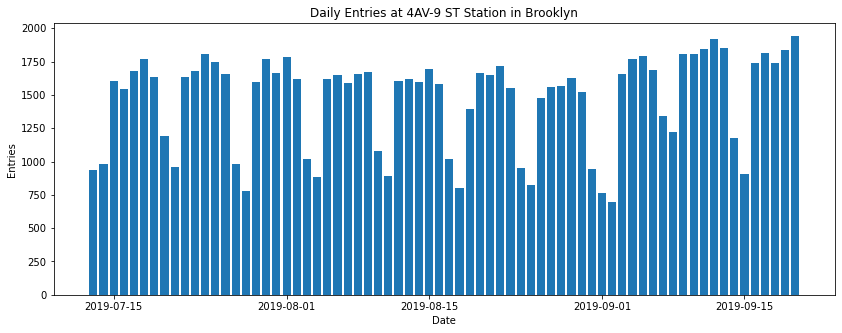

In [53]:
days = bk_station['date']
entries = bk_station['entries']

plt.figure(figsize=(14,5))
plt.bar(days,entries)

plt.xlabel('Date')
plt.ylabel('Entries')
plt.title('Daily Entries at 4AV-9 ST Station in Brooklyn')

plt.show()

In [40]:
# I probably rode at this station on 8/31/2019
bk_station_0831 = bk_station[bk_station['date'] == '2019-08-31']

In [43]:
bk_station_0831

,date,station,turnstile,entries
237777,2019-08-31,4AV-9 ST,4AV-9 ST-C012-R258-01-00-00,566.0
237778,2019-08-31,4AV-9 ST,4AV-9 ST-C012-R258-01-00-01,406.0
237779,2019-08-31,4AV-9 ST,4AV-9 ST-C012-R258-01-00-02,255.0
237780,2019-08-31,4AV-9 ST,4AV-9 ST-C012-R258-01-00-03,138.0
237781,2019-08-31,4AV-9 ST,4AV-9 ST-C012-R258-01-03-00,693.0
237782,2019-08-31,4AV-9 ST,4AV-9 ST-C012-R258-01-03-01,474.0
237783,2019-08-31,4AV-9 ST,4AV-9 ST-C012-R258-01-03-02,492.0
237784,2019-08-31,4AV-9 ST,4AV-9 ST-C012-R258-01-03-03,942.0
237785,2019-08-31,4AV-9 ST,4AV-9 ST-C012-R258-01-06-00,120.0
237786,2019-08-31,4AV-9 ST,4AV-9 ST-C012-R258-01-06-01,212.0


In [44]:
# 4. Pick a random turnstile: 4AV-9 ST-C012-R258-01-00-00

bk_turnstile = bk_station[bk_station['turnstile'] == '4AV-9 ST-C012-R258-01-00-00']

In [54]:
bk_turnstile.head()

,date,station,turnstile,entries
1120,2019-07-13,4AV-9 ST,4AV-9 ST-C012-R258-01-00-00,483.0
5959,2019-07-14,4AV-9 ST,4AV-9 ST-C012-R258-01-00-00,412.0
10798,2019-07-15,4AV-9 ST,4AV-9 ST-C012-R258-01-00-00,1199.0
15637,2019-07-16,4AV-9 ST,4AV-9 ST-C012-R258-01-00-00,1342.0
20471,2019-07-17,4AV-9 ST,4AV-9 ST-C012-R258-01-00-00,1354.0


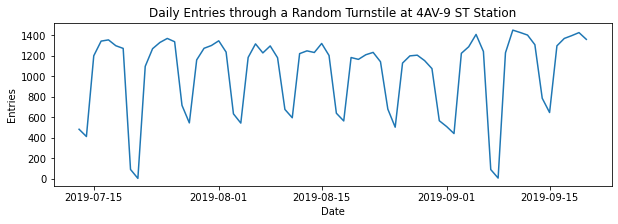

In [47]:
days = bk_turnstile['date']
entries = bk_turnstile['entries']

plt.figure(figsize=(10,3))
plt.plot(days,entries)

plt.xlabel('Date')
plt.ylabel('Entries')
plt.title('Daily Entries through a Random Turnstile at 4AV-9 ST Station')

plt.show()

In [16]:
# Daily Station ENTRIES
daily_station_entries = mta.groupby(['date', 'station'])[['entries']].sum().reset_index()

In [17]:
daily_station_entries.head()

,date,station,entries
0,2019-07-13,1 AV,5638.0
1,2019-07-13,103 ST,7223.0
2,2019-07-13,103 ST-CORONA,9792.0
3,2019-07-13,104 ST,1565.0
4,2019-07-13,110 ST,3830.0


In [ ]:
# fussing with top 10 average daily entries by station

In [29]:
top10_daily_station_entries = daily_station_entries.groupby(['station'])[['entries']].mean().reset_index()

In [31]:
top10_daily_station_entries = top10_daily_station_entries.nlargest(10, 'entries')

In [32]:
top10_daily_station_entries

,station,entries
61,34 ST-PENN STA,138313.542857
232,GRD CNTRL-42 ST,116549.042857
59,34 ST-HERALD SQ,102610.428571
46,23 ST,93681.100000
352,TIMES SQ-42 ST,85955.442857
14,14 ST-UNION SQ,84739.100000
225,FULTON ST,81197.742857
68,42 ST-PORT AUTH,79097.871429
110,86 ST,67839.442857
9,125 ST,65181.757143


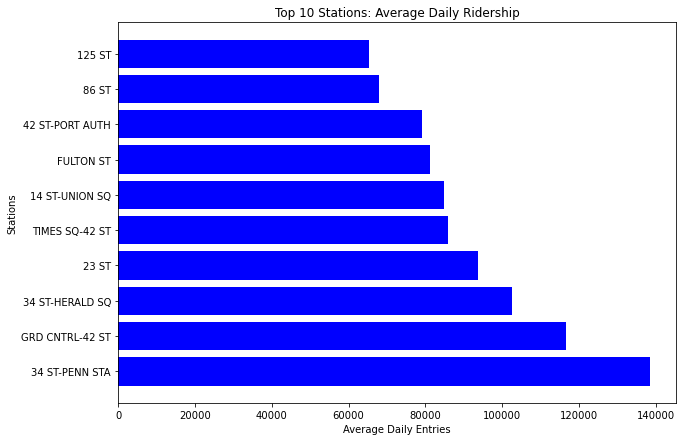

In [33]:
stations = top10_daily_station_entries['station']
entries = top10_daily_station_entries['entries']

plt.figure(figsize=(10,7))
plt.barh(stations, entries, color='blue')
plt.xlabel("Average Daily Entries")
plt.ylabel("Stations")
plt.title("Top 10 Stations: Average Daily Ridership")

plt.show()